# Analysis of the solar power plants data

In [213]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

plants_data = pd.read_csv("data/both_plants.csv", parse_dates=["DATE_TIME"])

Let's look at the first 5 entries to get an idea of what the data looks like

In [214]:
plants_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,1,1,0.0,0.0,0.000000,6.259559e+06,25.184316,22.857507,0.0
1,2020-05-15,2,4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0
2,2020-05-15,2,5,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0
3,2020-05-15,2,6,0.0,0.0,1872.500000,1.794959e+09,27.004764,25.060789,0.0
4,2020-05-15,2,7,0.0,0.0,1094.357143,2.825928e+08,27.004764,25.060789,0.0


PLANT_ID represents the plant number (1 or 2) while SOURCE_KEY represents the panel group (1-22).

Check for missing values

In [215]:
print("Total NaN values: ", plants_data.isnull().sum().sum())

Total NaN values:  0


Some more info on the whole dataset:

In [216]:
print(plants_data.describe())

                           DATE_TIME       PLANT_ID     SOURCE_KEY  \
count                         136472  136472.000000  136472.000000   
mean   2020-06-01 09:22:57.605662720       1.496058      11.477497   
min              2020-05-15 00:00:00       1.000000       1.000000   
25%              2020-05-23 23:00:00       1.000000       6.000000   
50%              2020-06-01 18:45:00       1.000000      12.000000   
75%              2020-06-09 21:45:00       2.000000      17.000000   
max              2020-06-17 23:45:00       2.000000      22.000000   
std                              NaN       0.499986       6.350339   

            DC_POWER       AC_POWER    DAILY_YIELD   TOTAL_YIELD  \
count  136472.000000  136472.000000  136472.000000  1.364720e+05   
mean     1708.373962     274.790259    3295.366192  3.303916e+08   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%         0.000000       0.000000      28.285714  6.520020e+06   
50%         5.993333       3.

We can also look at the differences between the two plants:

In [217]:
plant1_data = plants_data[plants_data['PLANT_ID'] == 1]
plant2_data = plants_data[plants_data['PLANT_ID'] == 2]

print("Plant 1 info:\n", plant1_data.describe())
print("Plant 2 info:\n", plant2_data.describe())

Plant 1 info:
                            DATE_TIME  PLANT_ID    SOURCE_KEY      DC_POWER  \
count                          68774   68774.0  68774.000000  68774.000000   
mean   2020-06-01 08:02:38.161514240       1.0     11.492105   3147.177450   
min              2020-05-15 00:00:00       1.0      1.000000      0.000000   
25%              2020-05-24 00:33:45       1.0      6.000000      0.000000   
50%              2020-06-01 14:15:00       1.0     11.000000    428.571429   
75%              2020-06-09 20:00:00       1.0     17.000000   6365.468750   
max              2020-06-17 23:45:00       1.0     22.000000  14471.125000   
std                              NaN       0.0      6.342934   4036.441826   

           AC_POWER   DAILY_YIELD   TOTAL_YIELD  AMBIENT_TEMPERATURE  \
count  68774.000000  68774.000000  6.877400e+04         68774.000000   
mean     307.778375   3295.834644  6.978728e+06            25.558521   
min        0.000000      0.000000  6.183645e+06            20.3985

Daily average power generated (AC and DC)

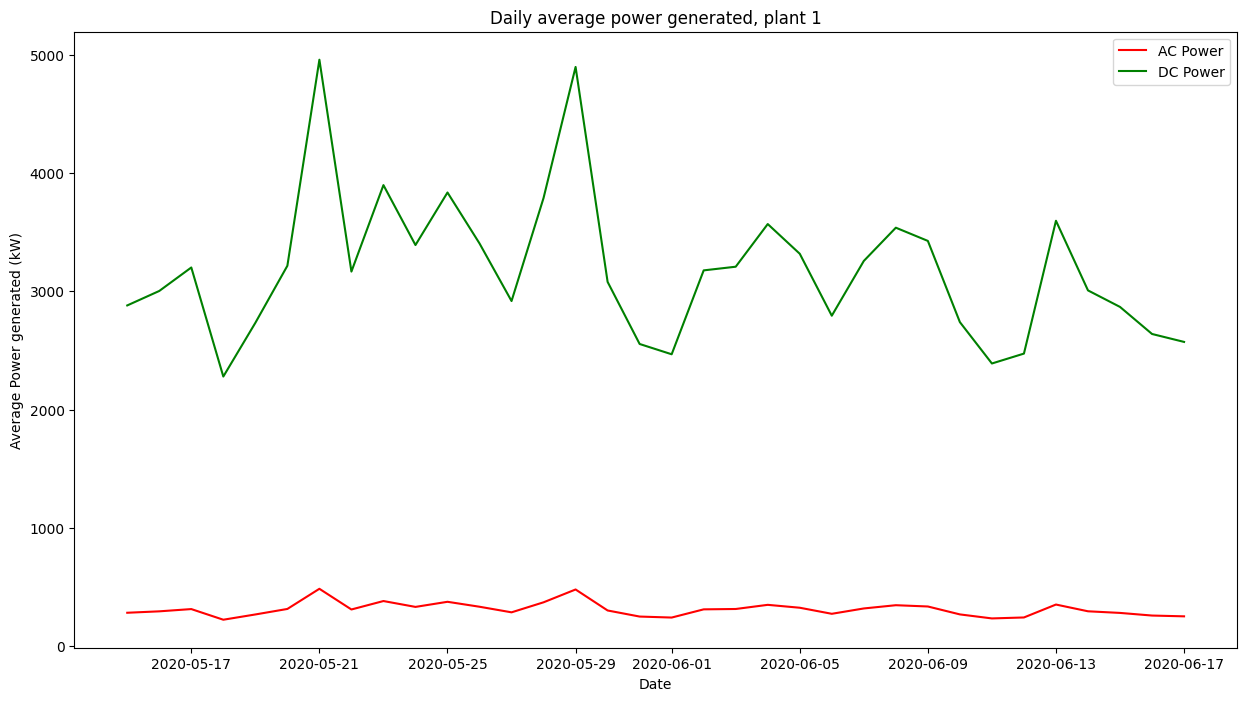

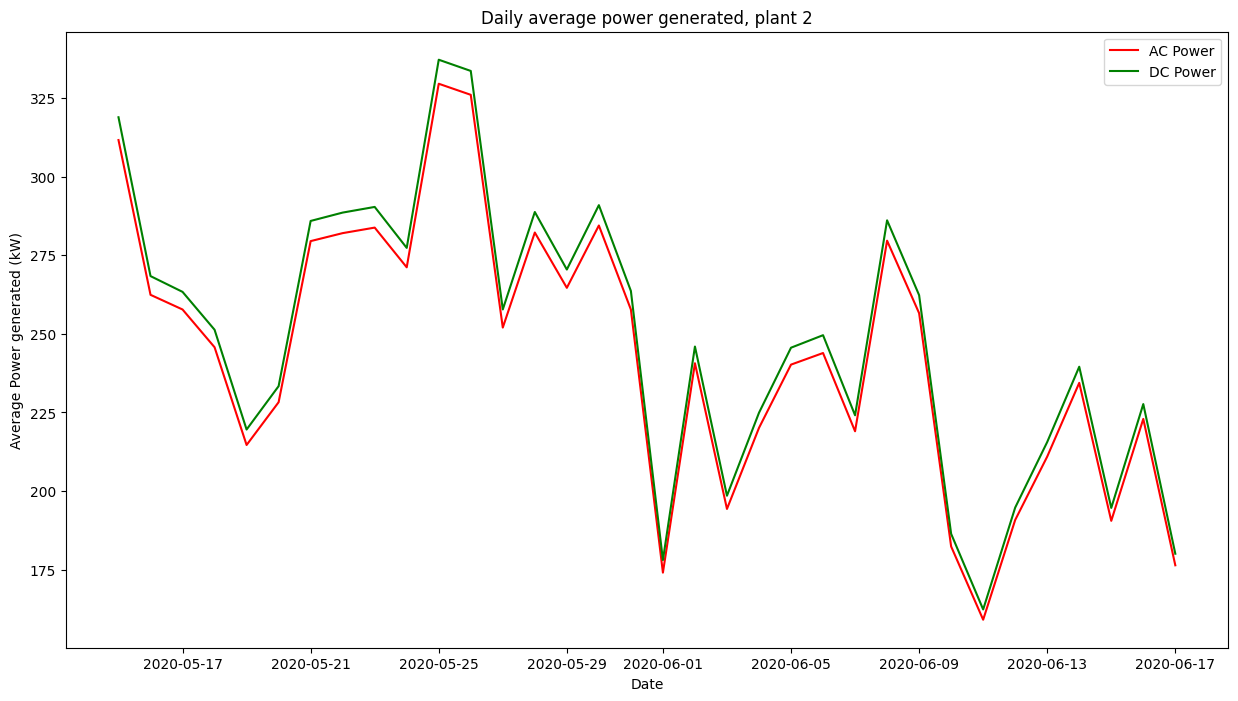

In [218]:
avg_power_daily_plant1 = plant1_data.groupby(plant1_data['DATE_TIME'].dt.date)[['AC_POWER','DC_POWER']].mean().reset_index()
avg_power_daily_plant2 = plant2_data.groupby(plant2_data['DATE_TIME'].dt.date)[['AC_POWER','DC_POWER']].mean().reset_index() 

plt.figure(figsize=(15,8))
plt.plot(avg_power_daily_plant1['DATE_TIME'], avg_power_daily_plant1['AC_POWER'], label='AC Power', color='red')
plt.plot(avg_power_daily_plant1['DATE_TIME'], avg_power_daily_plant1['DC_POWER'], label='DC Power', color='green')
plt.title('Daily average power generated, plant 1')
plt.xlabel('Date')
plt.ylabel('Average Power generated (kW)')
plt.legend()
plt.show()

plt.figure(figsize=(15,8))
plt.plot(avg_power_daily_plant2['DATE_TIME'], avg_power_daily_plant2['AC_POWER'], label='AC Power', color='red')
plt.plot(avg_power_daily_plant2['DATE_TIME'], avg_power_daily_plant2['DC_POWER'], label='DC Power', color='green')
plt.title('Daily average power generated, plant 2')
plt.xlabel('Date')
plt.ylabel('Average Power generated (kW)')
plt.legend()
plt.show()


Average power generated (AC and DC) per hour

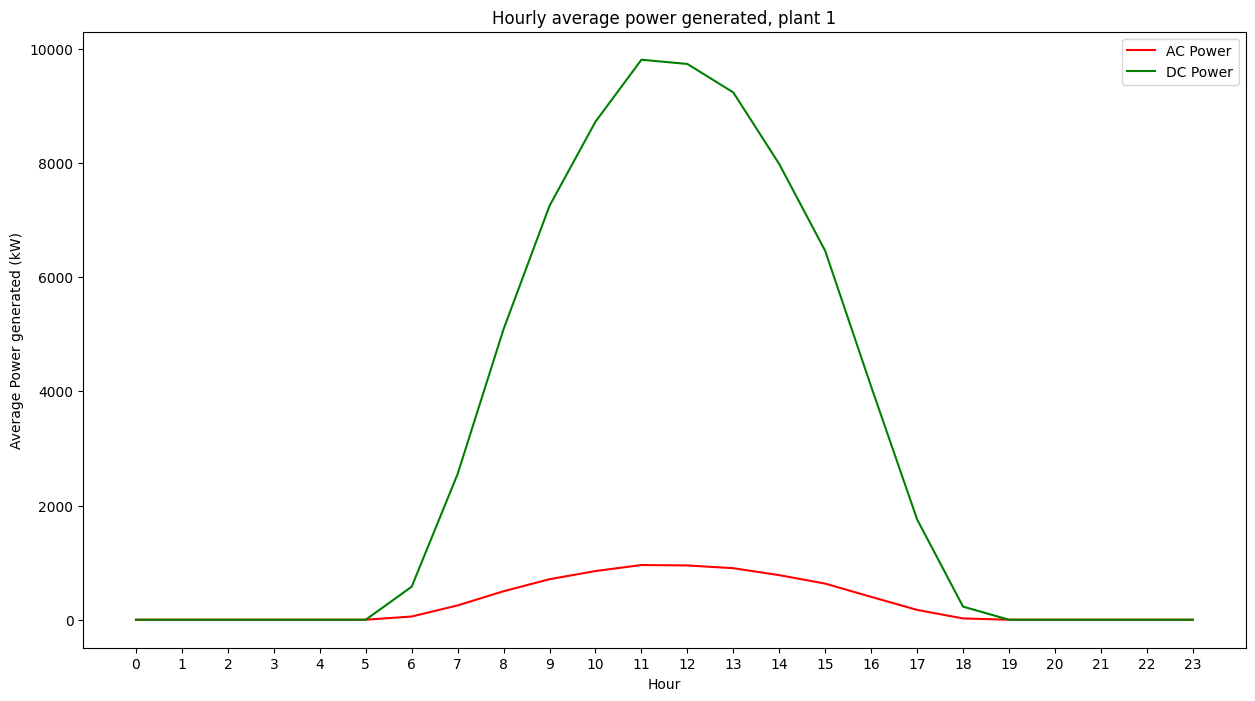

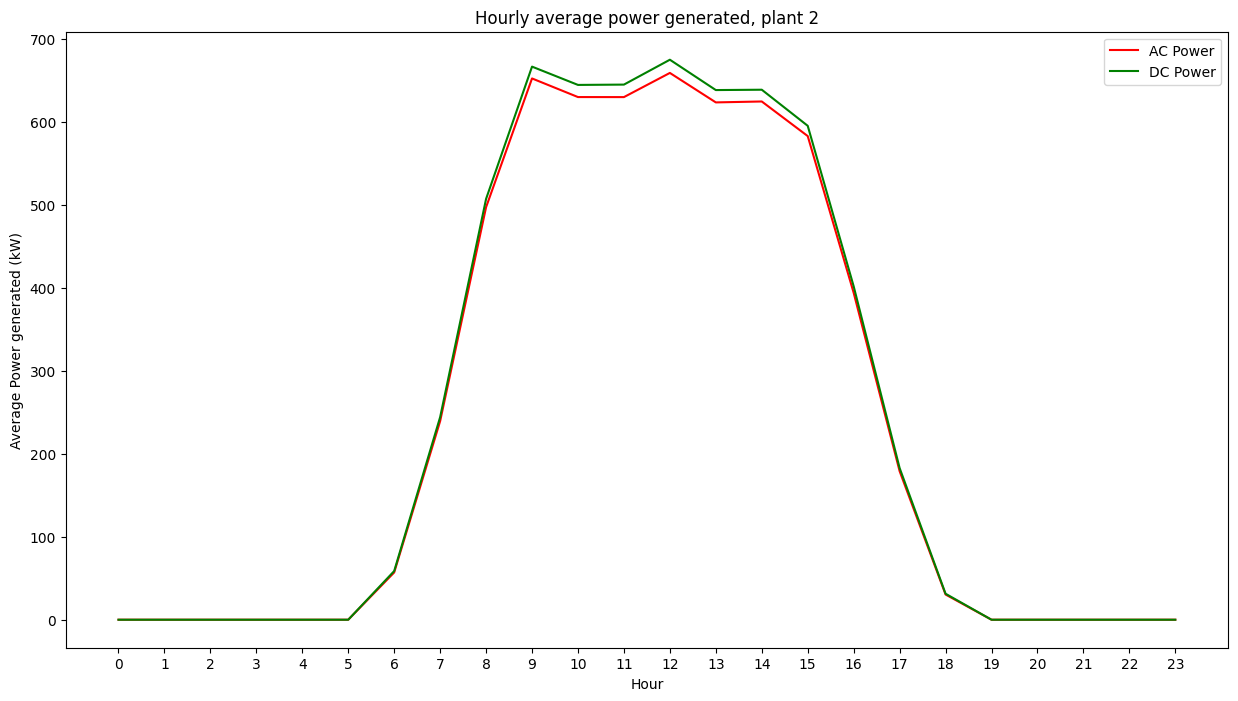

In [219]:
avg_power_hourly_plant1 = plant1_data.groupby(plant1_data['DATE_TIME'].dt.hour)[['AC_POWER','DC_POWER']].mean().reset_index()
avg_power_hourly_plant2 = plant2_data.groupby(plant2_data['DATE_TIME'].dt.hour)[['AC_POWER','DC_POWER']].mean().reset_index() 

plt.figure(figsize=(15,8))
plt.plot(avg_power_hourly_plant1['DATE_TIME'], avg_power_hourly_plant1['AC_POWER'], label='AC Power', color='red')
plt.plot(avg_power_hourly_plant1['DATE_TIME'], avg_power_hourly_plant1['DC_POWER'], label='DC Power', color='green')
plt.title('Hourly average power generated, plant 1')
plt.xlabel('Hour')
plt.ylabel('Average Power generated (kW)')
plt.xticks(range(0, 24))
plt.legend()
plt.show()

plt.figure(figsize=(15,8))
plt.plot(avg_power_hourly_plant2['DATE_TIME'], avg_power_hourly_plant2['AC_POWER'], label='AC Power', color='red')
plt.plot(avg_power_hourly_plant2['DATE_TIME'], avg_power_hourly_plant2['DC_POWER'], label='DC Power', color='green')
plt.title('Hourly average power generated, plant 2')
plt.xlabel('Hour')
plt.ylabel('Average Power generated (kW)')
plt.xticks(range(0, 24))
plt.legend()
plt.show()

Interesting to note: there's a big discrepancy between AC and DC power generated in plant 1. It means that the percentage of power being converted from DC to AC in plant 1 is significantly lower than in plant 2. In plant 2, almost all of the DC power is converted to AC power.

Daily average irradiation

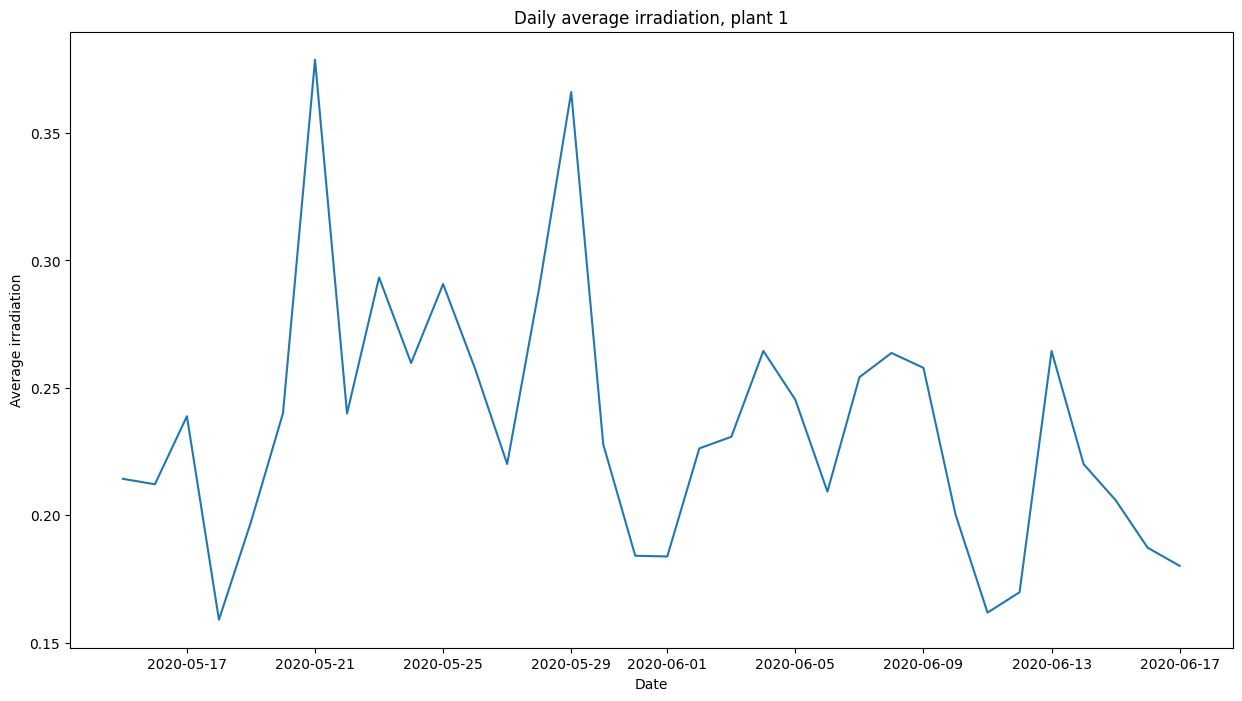

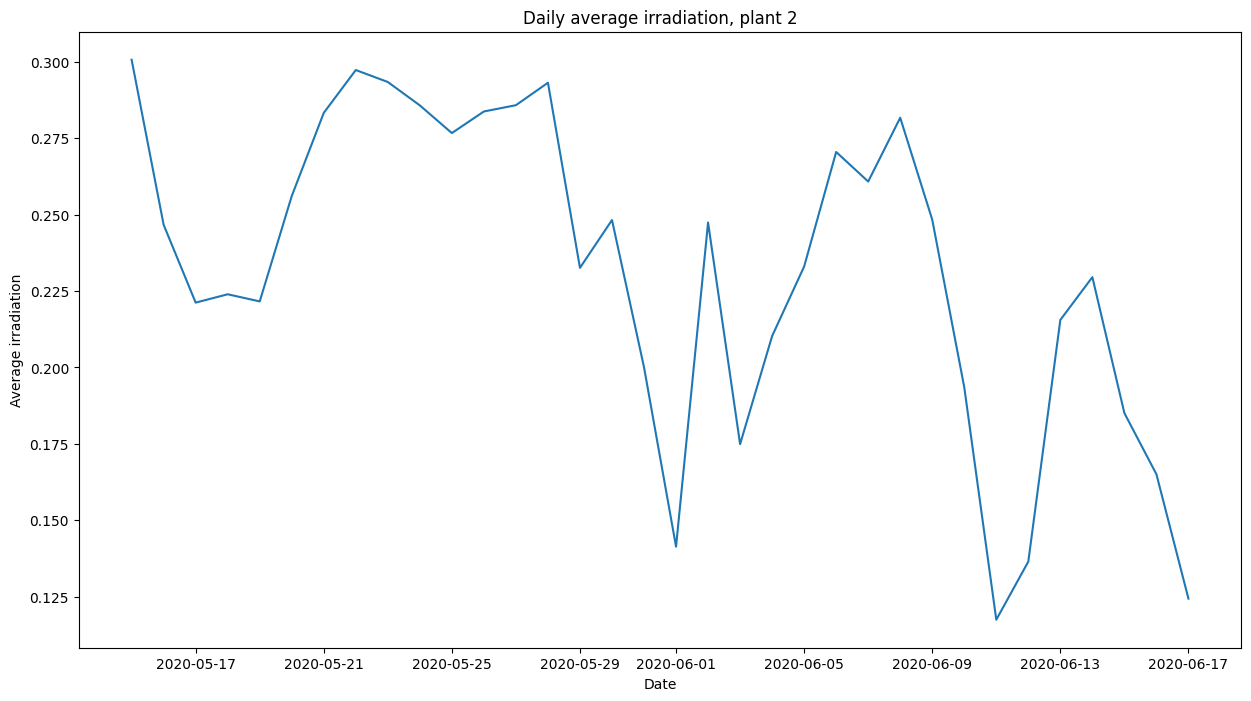

In [220]:
avg_irradiation_daily_plant1 = plant1_data.groupby(plant1_data['DATE_TIME'].dt.date)['IRRADIATION'].mean().reset_index()
avg_irradiation_daily_plant2 = plant2_data.groupby(plant2_data['DATE_TIME'].dt.date)['IRRADIATION'].mean().reset_index() 

plt.figure(figsize=(15,8))
plt.plot(avg_irradiation_daily_plant1['DATE_TIME'], avg_irradiation_daily_plant1['IRRADIATION'])
plt.title('Daily average irradiation, plant 1')
plt.xlabel('Date')
plt.ylabel('Average irradiation')
plt.show()

plt.figure(figsize=(15,8))
plt.plot(avg_irradiation_daily_plant2['DATE_TIME'], avg_irradiation_daily_plant2['IRRADIATION'])
plt.title('Daily average irradiation, plant 2')
plt.xlabel('Date')
plt.ylabel('Average irradiation')
plt.show()

Average irradiation per hour

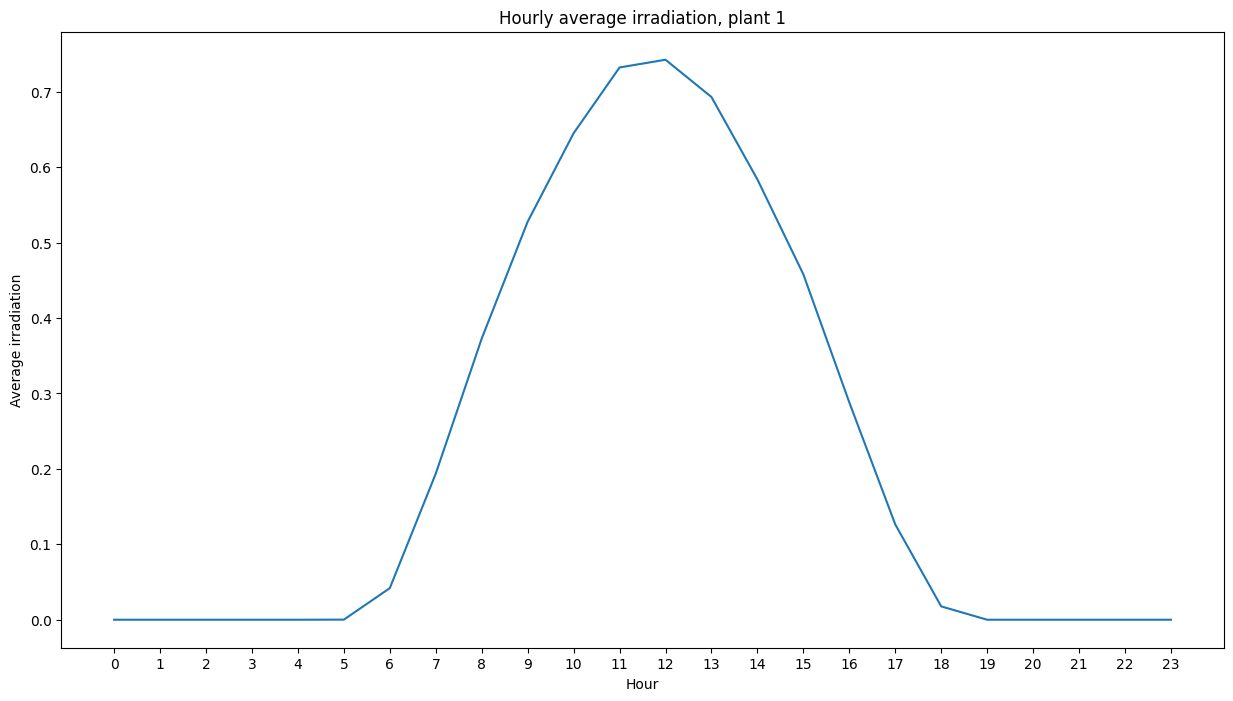

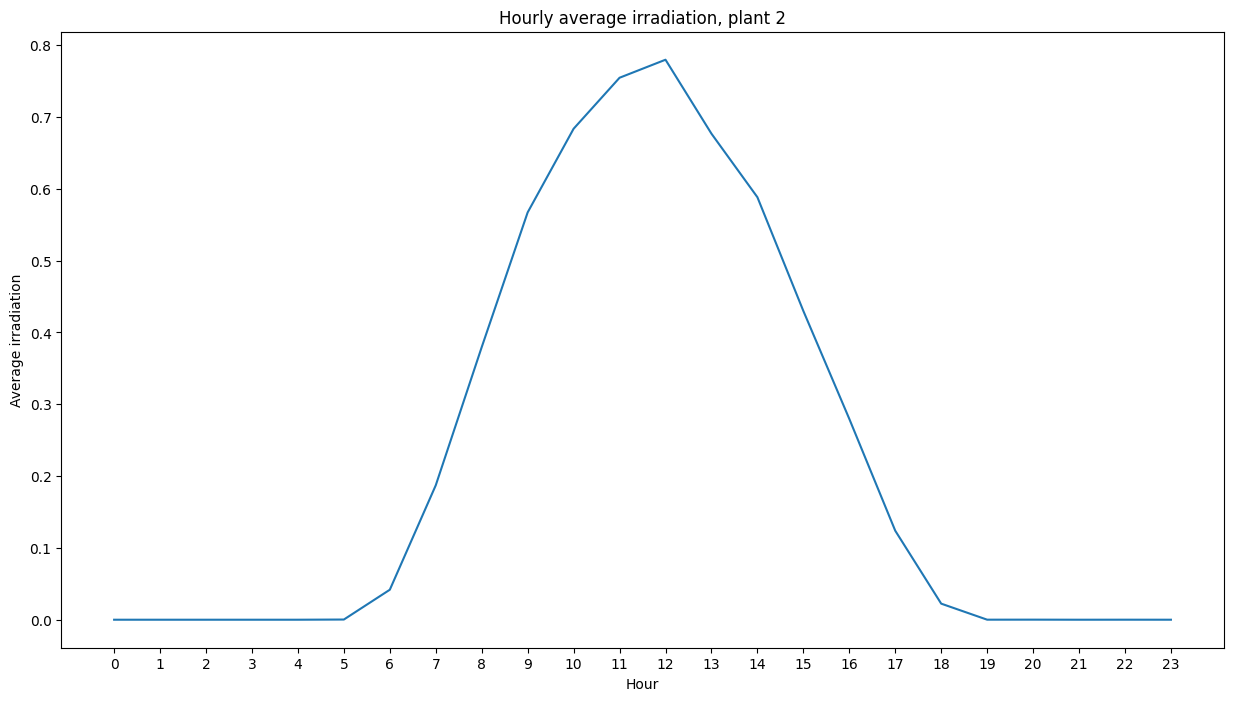

In [221]:
avg_irradiation_hourly_plant1 = plant1_data.groupby(plant1_data['DATE_TIME'].dt.hour)['IRRADIATION'].mean().reset_index()
avg_irradiation_hourly_plant2 = plant2_data.groupby(plant2_data['DATE_TIME'].dt.hour)['IRRADIATION'].mean().reset_index() 

plt.figure(figsize=(15,8))
plt.plot(avg_irradiation_hourly_plant1['DATE_TIME'], avg_irradiation_hourly_plant1['IRRADIATION'])
plt.title('Hourly average irradiation, plant 1')
plt.xlabel('Hour')
plt.ylabel('Average irradiation')
plt.xticks(range(0, 24))
plt.show()

plt.figure(figsize=(15,8))
plt.plot(avg_irradiation_hourly_plant2['DATE_TIME'], avg_irradiation_hourly_plant2['IRRADIATION'])
plt.title('Hourly average irradiation, plant 2')
plt.xlabel('Hour')
plt.ylabel('Average irradiation')
plt.xticks(range(0, 24))
plt.show()

Daily average temperature (ambient and module)

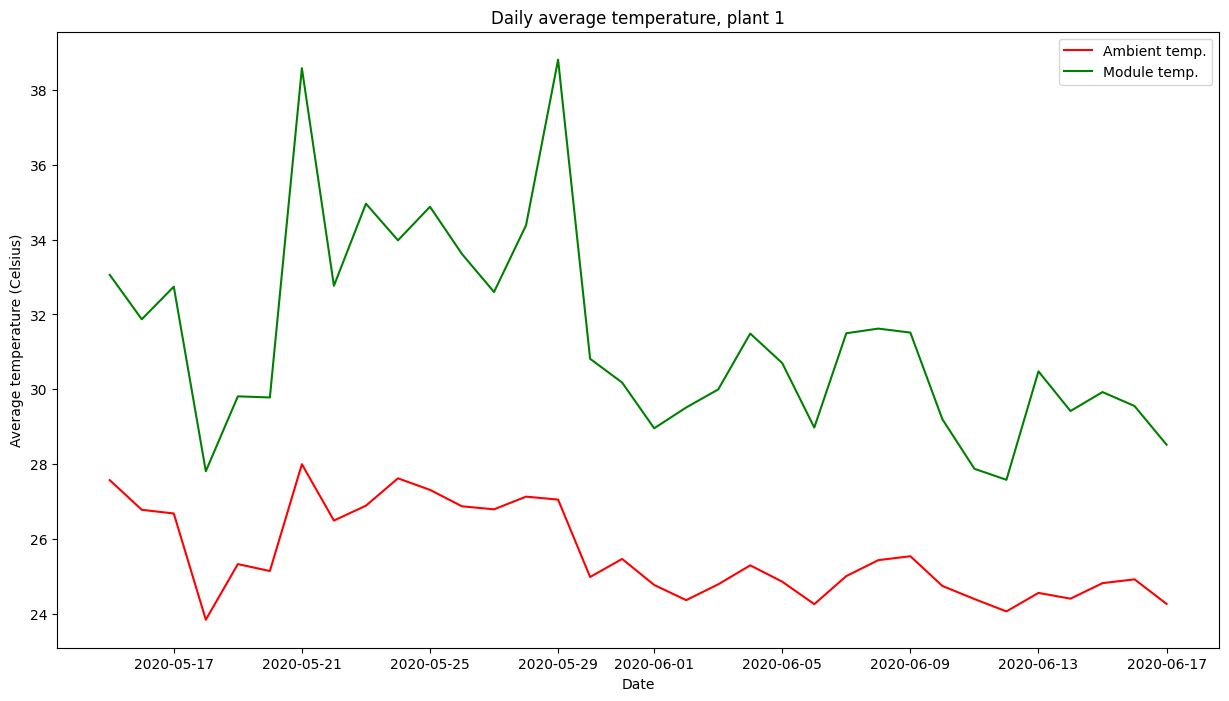

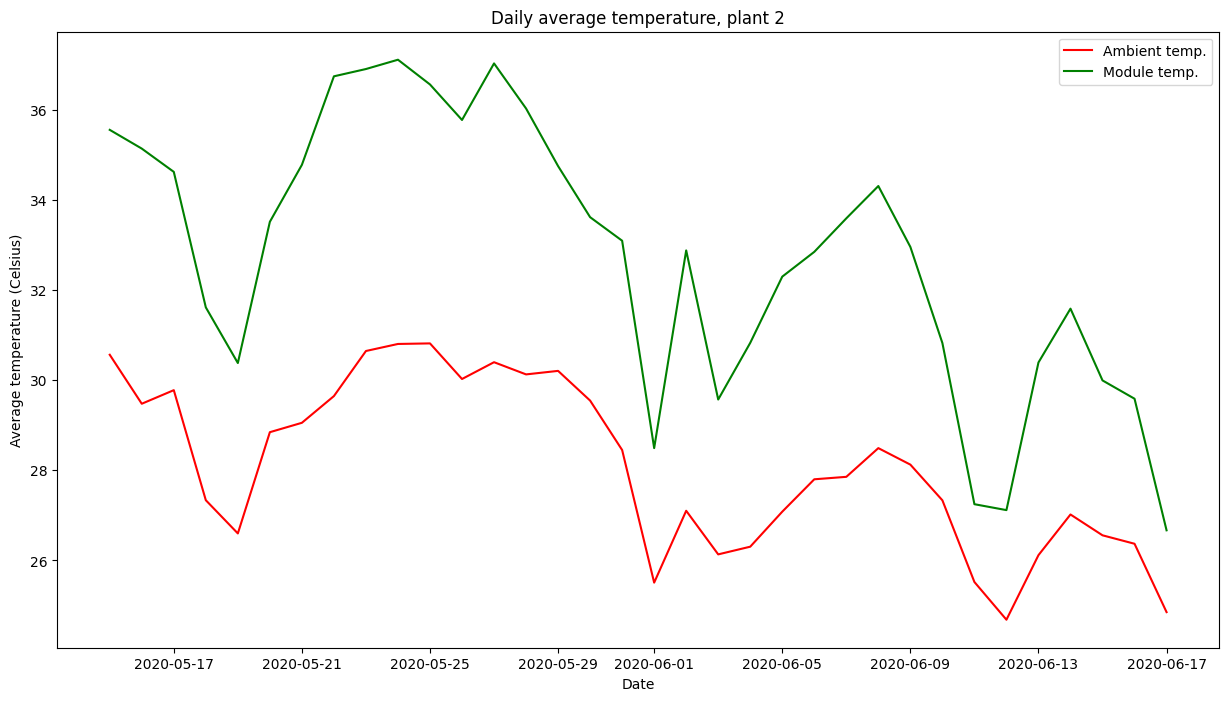

In [222]:
avg_temp_daily_plant1 = plant1_data.groupby(plant1_data['DATE_TIME'].dt.date)[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE']].mean().reset_index()
avg_temp_daily_plant2 = plant2_data.groupby(plant2_data['DATE_TIME'].dt.date)[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE']].mean().reset_index() 

plt.figure(figsize=(15,8))
plt.plot(avg_temp_daily_plant1['DATE_TIME'], avg_temp_daily_plant1['AMBIENT_TEMPERATURE'], label='Ambient temp.', color='red')
plt.plot(avg_temp_daily_plant1['DATE_TIME'], avg_temp_daily_plant1['MODULE_TEMPERATURE'], label='Module temp.', color='green')
plt.title('Daily average temperature, plant 1')
plt.xlabel('Date')
plt.ylabel('Average temperature (Celsius)')
plt.legend()
plt.show()

plt.figure(figsize=(15,8))
plt.plot(avg_temp_daily_plant2['DATE_TIME'], avg_temp_daily_plant2['AMBIENT_TEMPERATURE'], label='Ambient temp.', color='red')
plt.plot(avg_temp_daily_plant2['DATE_TIME'], avg_temp_daily_plant2['MODULE_TEMPERATURE'], label='Module temp.', color='green')
plt.title('Daily average temperature, plant 2')
plt.xlabel('Date')
plt.ylabel('Average temperature (Celsius)')
plt.legend()
plt.show()

Average temperature (ambient and module) per hour

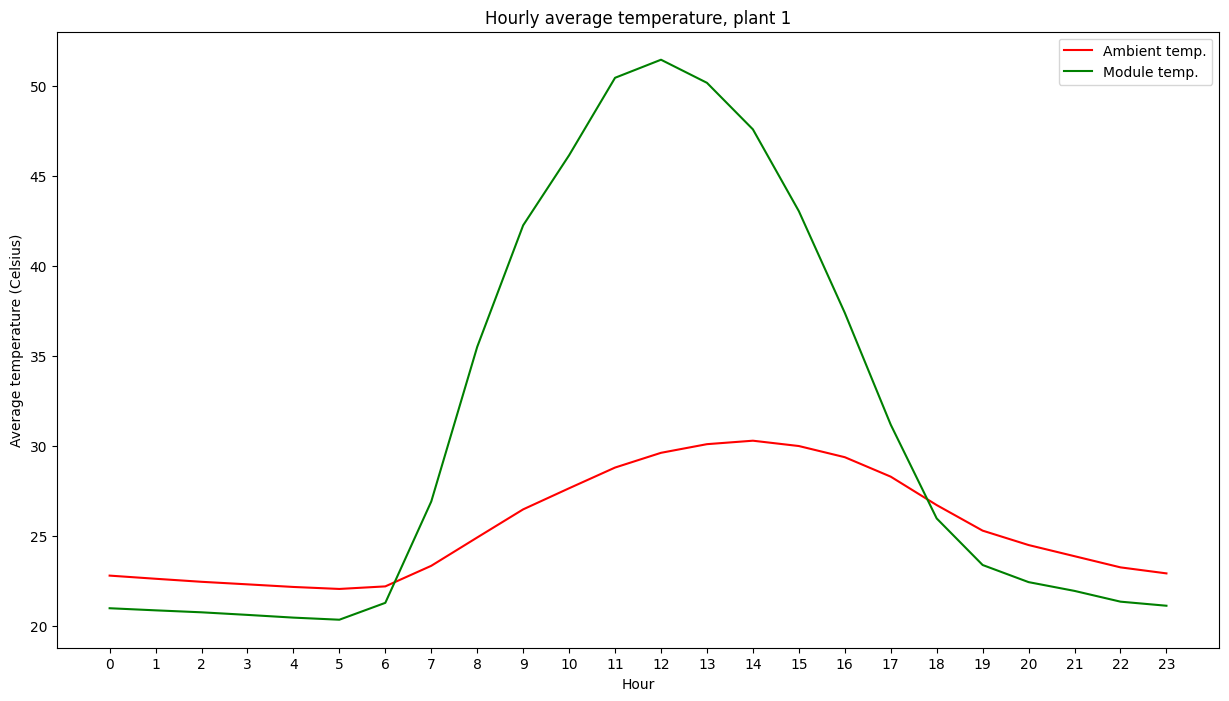

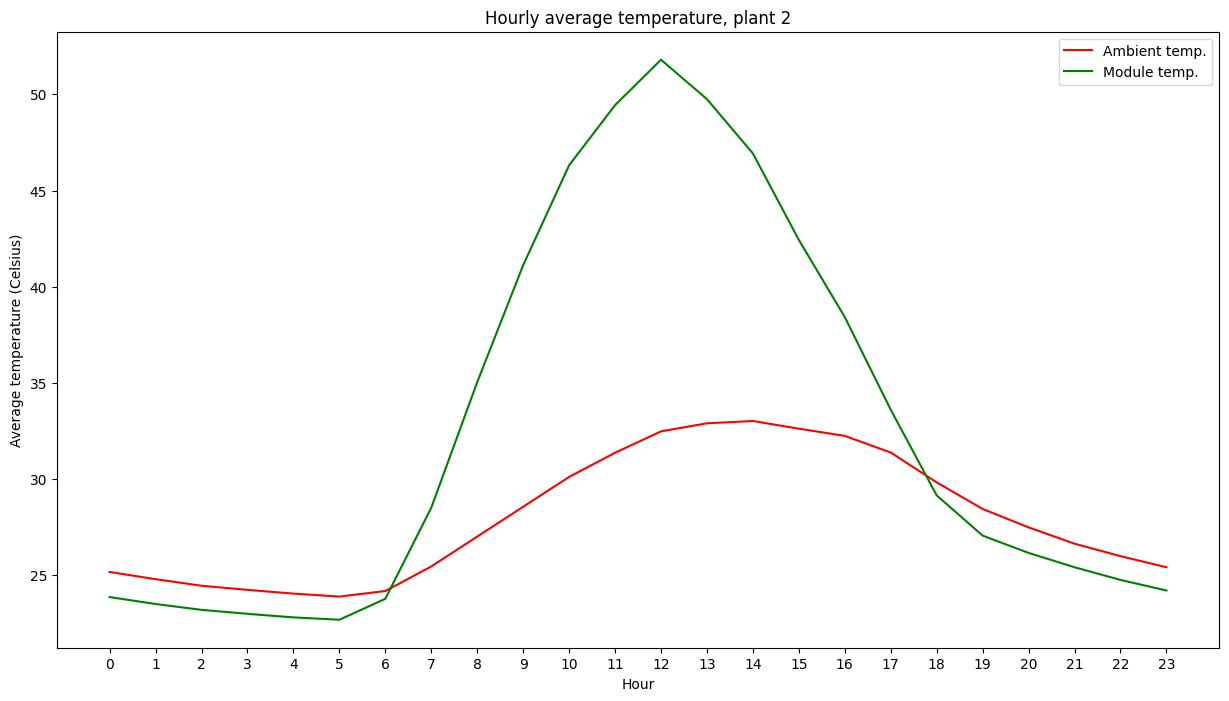

In [223]:
avg_temp_hourly_plant1 = plant1_data.groupby(plant1_data['DATE_TIME'].dt.hour)[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE']].mean().reset_index()
avg_temp_hourly_plant2 = plant2_data.groupby(plant2_data['DATE_TIME'].dt.hour)[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE']].mean().reset_index() 

plt.figure(figsize=(15,8))
plt.plot(avg_temp_hourly_plant1['DATE_TIME'], avg_temp_hourly_plant1['AMBIENT_TEMPERATURE'], label='Ambient temp.', color='red')
plt.plot(avg_temp_hourly_plant1['DATE_TIME'], avg_temp_hourly_plant1['MODULE_TEMPERATURE'], label='Module temp.', color='green')
plt.title('Hourly average temperature, plant 1')
plt.xlabel('Hour')
plt.ylabel('Average temperature (Celsius)')
plt.xticks(range(0, 24))
plt.legend()
plt.show()

plt.figure(figsize=(15,8))
plt.plot(avg_temp_hourly_plant2['DATE_TIME'], avg_temp_hourly_plant2['AMBIENT_TEMPERATURE'], label='Ambient temp.', color='red')
plt.plot(avg_temp_hourly_plant2['DATE_TIME'], avg_temp_hourly_plant2['MODULE_TEMPERATURE'], label='Module temp.', color='green')
plt.title('Hourly average temperature, plant 2')
plt.xlabel('Hour')
plt.ylabel('Average temperature (Celsius)')
plt.xticks(range(0, 24))
plt.legend()
plt.show()

According to the plots, it looks like AC/DC power generated, irradiation and temperature all peak during the same days/hours, which might point to a positive correlation between these variables. Let's check it:

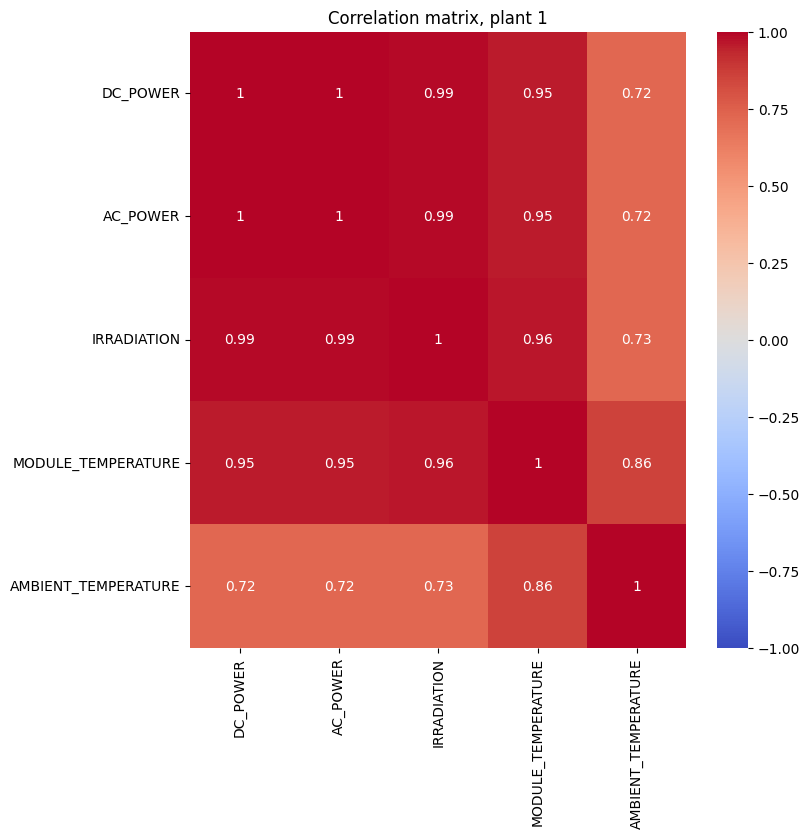

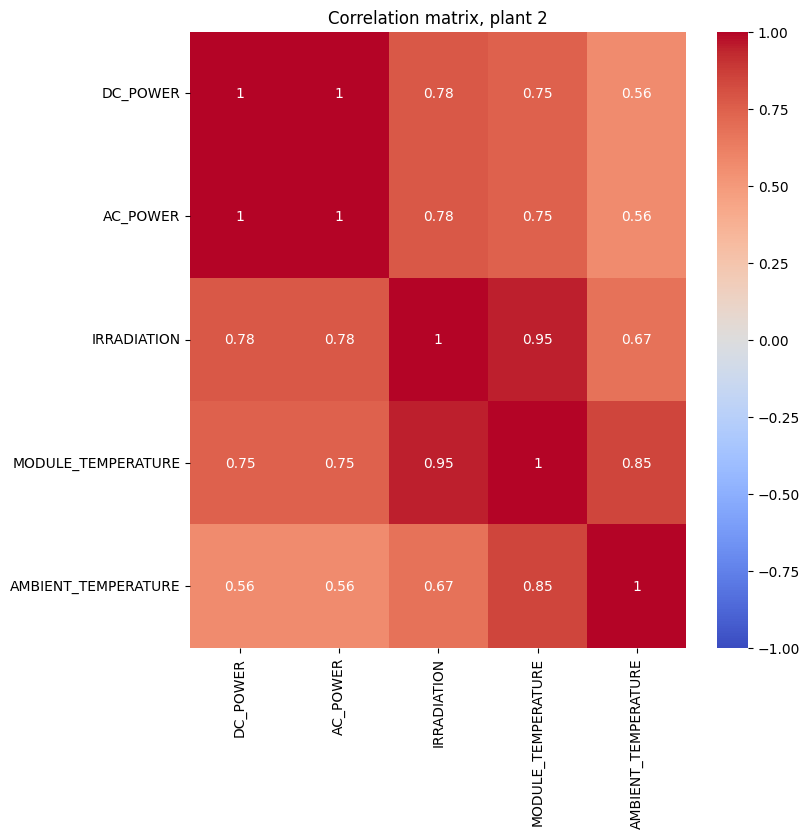

In [224]:
correlation_matrix_plant1 = plant1_data[["DC_POWER","AC_POWER","IRRADIATION","MODULE_TEMPERATURE","AMBIENT_TEMPERATURE"]].corr()
correlation_matrix_plant2 = plant2_data[["DC_POWER","AC_POWER","IRRADIATION","MODULE_TEMPERATURE","AMBIENT_TEMPERATURE"]].corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix_plant1, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix, plant 1')
plt.show()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix_plant2, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix, plant 2')
plt.show()

Indeed, there seems to be quite a strong correlation between these variables. Only the ambient temperature seems to have a weaker correlation with the other variables. Interestingly, the correlations are stronger in plant 1.